In [1]:
cd

/home/luxx0489


In [2]:
# import packages
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from mne.io import read_raw_edf
from mne.viz import plot_evoked_topo, plot_evoked
from scipy.signal import welch,periodogram
from anlffr import spectral
from scipy.io import loadmat, savemat
from matplotlib.colors import from_levels_and_colors

#%matplotlib qt

/home/luxx0489/.conda/envs/mne/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
startID = 1
endID = 19

total_row = (endID-startID)*2*2
output = np.empty((total_row,71))
# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98), PLV*66 (64 channels+mastoid)

Freq_list = [43.43, 98.28]

row_num = 0

for iSubject in range(startID,endID):# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/"
    sub_id = 'Sub' + str(iSubject)
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    refs = np.dstack((linked_mastoid,diff_horizontal)).transpose(0,2,1)
    data_wref = np.concatenate((data,refs),axis=1)
    xw_a = np.fft.rfft(np.hamming(data.shape[2])*data_wref, axis=2)
    plv_a = abs((xw_a/abs(xw_a)).mean(0))
    
    data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]   
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    refs = np.dstack((linked_mastoid,diff_horizontal)).transpose(0,2,1)
    data_wref = np.concatenate((data,refs),axis=1)
    xw_m = np.fft.rfft(np.hamming(data.shape[2])*data_wref, axis=2)
    plv_m = abs((xw_m/abs(xw_m)).mean(0))
    
    freq = np.fft.rfftfreq(data.shape[2],1/4096)
    
    for iFreq in range(2):
        index = np.argmin(abs(freq-Freq_list[iFreq]))

        output[row_num,0] = iSubject
        output[row_num,1] = 0
        output[row_num,2] = Freq_list[iFreq]
        output[row_num,3:69] = plv_a[0:66,index]
        output[row_num,69:71] = plv_a[67:69,index]
        
        row_num +=1
        
        output[row_num,0] = iSubject
        output[row_num,1] = 1
        output[row_num,2] = Freq_list[iFreq]
        output[row_num,3:69] = plv_m[0:66,index]
        output[row_num,69:71] = plv_m[67:69,index]

        row_num +=1

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/Sub1/Sub1_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3276799  =      0.000 ...   800.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1000 events found
Event IDs: [1 2]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/Sub2/Sub2_TMR0_MSK.bdf...
BDF file detected
Setti

/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1000 events found
Event IDs: [1 2]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/Sub3/Sub3_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3354623  =      0.000 ...   819.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the begi

Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/Sub12/Sub12_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3264511  =      0.000 ...   797.000 secs...
1000 events found
Event IDs: [1 2]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_100Hz/Sub13/Sub13_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3280895  =      0.000 ...  

                           ID        A1        A2        A3        A4  \
reference      frequency                                                
average        43.43      9.5  0.042133  0.042343  0.064224  0.091613   
               98.28      9.5  0.034100  0.035766  0.060693  0.090938   
linked mastoid 43.43      9.5  0.060580  0.055735  0.083675  0.097572   
               98.28      9.5  0.064340  0.062884  0.095824  0.111995   

                                A5        A6        A7        A8        A9  \
reference      frequency                                                     
average        43.43      0.051848  0.038664  0.034046  0.029760  0.035999   
               98.28      0.054453  0.027705  0.021334  0.027499  0.027398   
linked mastoid 43.43      0.076006  0.052094  0.057533  0.045845  0.065254   
               98.28      0.095636  0.064668  0.052881  0.056382  0.070320   

                          ...       B29       B30       B31       B32  \
reference      freq

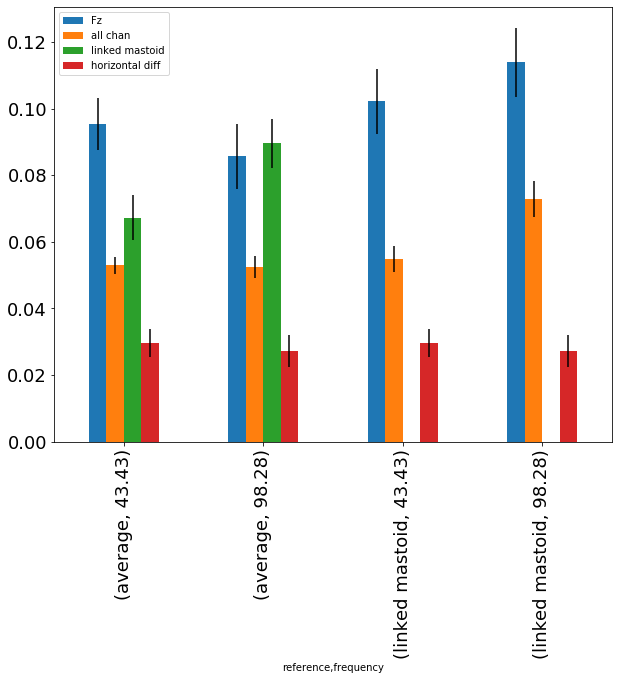

In [23]:
df = pd.DataFrame(output,columns=['ID','reference','frequency']
                  + epochs.info['ch_names'][0:66] + ['linked mastoid','horizontal diff'])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_f['all chan'] = df_f.loc[:,'A1':'B32'].mean(axis=1)
df_f['Fz'] = df_f['B6']
df_group = df_f.groupby(by=['reference','frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(18)
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['Fz','all chan','linked mastoid','horizontal diff']].plot(kind='bar',yerr=df_std,figsize = (10,8),fontsize=18)


In [7]:
df_group[['Fz','all chan','linked mastoid','horizontal diff']].corr(method='spearman')

Fz  all chan  linked mastoid  \
reference      frequency                                                       
average        43.43     Fz               1.000000  0.684211        0.446852   
                         all chan         0.684211  1.000000        0.382869   
                         linked mastoid   0.446852  0.382869        1.000000   
                         horizontal diff -0.124871  0.093911        0.065015   
               98.28     Fz               1.000000  0.587203        0.343653   
                         all chan         0.587203  1.000000        0.585139   
                         linked mastoid   0.343653  0.585139        1.000000   
                         horizontal diff  0.062951  0.238390        0.159959   
linked mastoid 43.43     Fz               1.000000  0.853457             NaN   
                         all chan         0.853457  1.000000             NaN   
                         linked mastoid        NaN       NaN             NaN   
                         horizontal diff  0.124871  0.323013             NaN   
               98.28     Fz               1.000000  0.721362             NaN   
                         all chan         0.721362  1.000000             NaN   
                         linked mastoid        NaN       NaN             NaN   
                         horizontal diff  0.420021  0.248710             NaN   

                                          horizontal diff  
reference      frequency                                   
average        43.43     Fz                     -0.124871  
                         all chan                0.093911  
                         linked mastoid          0.065015  
                         horizontal diff         1.000000  
               98.28     Fz                      0.062951  
                         all chan                0.238390  
                         linked mastoid          0.159959  
                         horizontal diff         1.000000  
linked mastoid 43.43     Fz                      0.124871  
                         all chan                0.323013  
                         linked mastoid               NaN  
                         horizontal diff         1.000000  
               98.28     Fz                      0.420021  
                         all chan                0.248710  
                         linked mastoid               NaN  
                         horizontal diff         1.000000

In [24]:
startID = 1
endID = 9

total_row = (endID-startID)*2*2
output = np.empty((total_row,71))
# ID, reference(0 for ave, 1 for mastoid), frequency(43.43 and 98), PLV*66 (64 channels+mastoid)

Freq_list = [43.43, 233.13]

row_num = 0

for iSubject in range(startID,endID):# range(2,18):

    folder_path = "./jupyter_projects/MultiChannelSSSR/EEG_data_40_200Hz/"
    sub_id = 'Sub' + str(iSubject)
    raw = mne.io.read_raw_bdf(folder_path + sub_id + '/' + sub_id + '_TMR0_MSK.bdf',
                                   stim_channel='Status', preload=True, exclude = ['EXG3','EXG4','EXG5','EXG6','EXG7','EXG8'])
    events = mne.find_events(raw)

    epochs = mne.Epochs(raw,events=events, tmin=-0.5, tmax=0.5)
    epochs.load_data()
    ep_m = epochs.copy().set_eeg_reference(ref_channels=['EXG1','EXG2'])
    ep_a = epochs.copy().set_eeg_reference(ref_channels='average')

    data = ep_a.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    refs = np.dstack((linked_mastoid,diff_horizontal)).transpose(0,2,1)
    data_wref = np.concatenate((data,refs),axis=1)
    xw_a = np.fft.rfft(np.hamming(data.shape[2])*data_wref, axis=2)
    plv_a = abs((xw_a/abs(xw_a)).mean(0))
    
    data = ep_m.get_data()[:,:,int(np.round((0.5)*4096)):int(np.round((0.5+0.43752)*4096))]   
    linked_mastoid = data[:,64:66,:].mean(1)
    diff_horizontal = data[:,64,:] - data[:,65,:]
    refs = np.dstack((linked_mastoid,diff_horizontal)).transpose(0,2,1)
    data_wref = np.concatenate((data,refs),axis=1)
    xw_m = np.fft.rfft(np.hamming(data.shape[2])*data_wref, axis=2)
    plv_m = abs((xw_m/abs(xw_m)).mean(0))
    
    freq = np.fft.rfftfreq(data.shape[2],1/4096)
    
    for iFreq in range(2):
        index = np.argmin(abs(freq-Freq_list[iFreq]))

        output[row_num,0] = iSubject
        output[row_num,1] = 0
        output[row_num,2] = Freq_list[iFreq]
        output[row_num,3:69] = plv_a[0:66,index]
        output[row_num,69:71] = plv_a[67:69,index]
        
        row_num +=1
        
        output[row_num,0] = iSubject
        output[row_num,1] = 1
        output[row_num,2] = Freq_list[iFreq]
        output[row_num,3:69] = plv_m[0:66,index]
        output[row_num,69:71] = plv_m[67:69,index]

        row_num +=1

Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_200Hz/Sub1/Sub1_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3272703  =      0.000 ...   799.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1000 events found
Event IDs: [1 2]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_200Hz/Sub2/Sub2_TMR0_MSK.bdf...
BDF file detected
Setti

/home/luxx0489/.conda/envs/mne/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1000 events found
Event IDs: [1 2]
1000 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1000 events and 4097 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying a custom EEG reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Extracting EDF parameters from /home/luxx0489/jupyter_projects/MultiChannelSSSR/EEG_data_40_200Hz/Sub3/Sub3_TMR0_MSK.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3268607  =      0.000 ...   798.000 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the begi

                           ID        A1        A2        A3        A4  \
reference      frequency                                                
average        43.43      4.5  0.034441  0.029412  0.031805  0.049585   
               233.13     4.5  0.027653  0.025671  0.026442  0.030976   
linked mastoid 43.43      4.5  0.041213  0.026209  0.045609  0.053142   
               233.13     4.5  0.042526  0.044168  0.054190  0.065064   

                                A5        A6        A7        A8        A9  \
reference      frequency                                                     
average        43.43      0.044659  0.033914  0.030916  0.026902  0.031327   
               233.13     0.032875  0.029044  0.028007  0.027888  0.025682   
linked mastoid 43.43      0.048997  0.032588  0.039365  0.026449  0.037027   
               233.13     0.054301  0.045872  0.038630  0.041436  0.040593   

                          ...       B29       B30       B31       B32  \
reference      freq

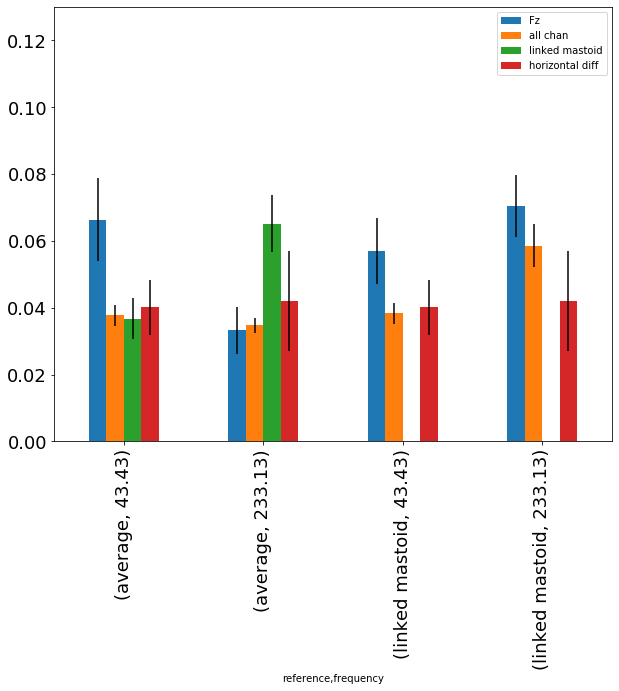

In [26]:
df = pd.DataFrame(output,columns=['ID','reference','frequency']
                  + epochs.info['ch_names'][0:66] + ['linked mastoid','horizontal diff'])
df.head()

dictionary = {0:'average',1:'linked mastoid'}

df_f = df.copy().replace({'reference':dictionary})

df_f['all chan'] = df_f.loc[:,'A1':'B32'].mean(axis=1)
df_f['Fz'] = df_f['B6']
df_group = df_f.groupby(by=['reference','frequency'])
df_avg = df_group.mean()
df_std = df_group.std()/np.sqrt(8)
df_avg.drop(columns='ID')
print(df_avg)

p = df_avg[['Fz','all chan','linked mastoid','horizontal diff']].plot(kind='bar',yerr=df_std,figsize = (10,8),fontsize=18,
                                                                     ylim=(0,0.13))


In [133]:
df_group[['all chan','linked mastoid','horizontal diff']].corr(method='spearman')

all chan  linked mastoid  \
reference      frequency                                             
average        43.43     all chan         1.000000       -0.333333   
                         linked mastoid  -0.333333        1.000000   
                         horizontal diff  0.000000        0.595238   
               233.13    all chan         1.000000       -0.023810   
                         linked mastoid  -0.023810        1.000000   
                         horizontal diff  0.142857        0.428571   
linked mastoid 43.43     all chan         1.000000             NaN   
                         linked mastoid        NaN             NaN   
                         horizontal diff  0.476190             NaN   
               233.13    all chan         1.000000             NaN   
                         linked mastoid        NaN             NaN   
                         horizontal diff  0.523810             NaN   

                                          horizontal diff  
reference      frequency                                   
average        43.43     all chan                0.000000  
                         linked mastoid          0.595238  
                         horizontal diff         1.000000  
               233.13    all chan                0.142857  
                         linked mastoid          0.428571  
                         horizontal diff         1.000000  
linked mastoid 43.43     all chan                0.476190  
                         linked mastoid               NaN  
                         horizontal diff         1.000000  
               233.13    all chan                0.523810  
                         linked mastoid               NaN  
                         horizontal diff         1.000000